# Anz Virtual Internship Report 2

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings("ignore")
%matplotlib inline

### 1.1 load data

In [5]:
df = pd.read_excel("data/ANZ synthesised transaction dataset.xlsx")
print(df.shape)
df.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### 1.2 data exploration

Text(0.5, 1.0, 'Pay/Salary amount by age')

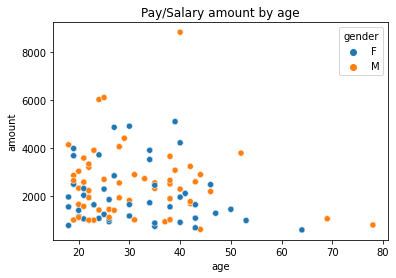

In [11]:
sns.scatterplot(data=df, x='age', y=df.loc[df['txn_description']=='PAY/SALARY']['amount'],hue='gender').set_title("Pay/Salary amount by age")

In [33]:
# Number of male
len(df.loc[df['gender']=="M"]['customer_id'].unique())
# female = 100 - 56 = 44

56

##### Gender
* male - 56
* female - 44

In [84]:
# Make gender categorical column
df['gender_cat'] = 0
df.loc[df['gender']=="F", "gender_cat"] = 1
interested = ['gender', 'gender_cat']
df[interested].head()

,gender,gender_cat
0,F,1
1,F,1
2,M,0
3,F,1
4,F,1


In [39]:
# Make age_group column
df['age_group'] = 70
df.loc[df['age']<70, 'age_group'] = 60
df.loc[df['age']<60, 'age_group'] = 50
df.loc[df['age']<50, 'age_group'] = 40
df.loc[df['age']<40, 'age_group'] = 30
df.loc[df['age']<30, 'age_group'] = 20
df.loc[df['age']<20, 'age_group'] = 10
df.age_group.unique()

array([20, 30, 40, 10, 70, 60, 50], dtype=int64)

In [26]:
group = ['customer_id', 'age_group', 'gender']
interested = ['amount', 'balance']
function = ['count','mean', 'sum']
df.groupby('age_group').agg(function)[interested]

amount                        balance                           
           count        mean        sum   count          mean          sum
age_group                                                                 
10s         1135  198.411771  225197.36    1135  11276.002000  12798262.27
20s         5337  162.143461  865359.65    5337   8581.355007  45798691.67
30s         3200  195.986144  627155.66    3200  12140.798650  38850555.68
40s         1953  227.047512  443423.79    1953  38263.701859  74729009.73
50s          194  319.767268   62034.85     194  11220.341753   2176746.30
60s          190  154.040211   29267.64     190   4658.839947    885179.59
70s           34  318.977941   10845.25      34  54240.641471   1844181.81

In [43]:
df['month'] = df['date'].apply(lambda x: x.month)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,age_group,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,20,8
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,20,8
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,30,8
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,40,8
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,30,10
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,20,10
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,20,10
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,60,10


In [44]:
df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==8]['age_group'].value_counts()

20    116
30     79
40     55
10     24
60     10
50     10
70      4
Name: age_group, dtype: int64

In [45]:
df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==9]['age_group'].value_counts()

20    103
30     72
40     53
10     24
60      8
50      8
70      4
Name: age_group, dtype: int64

In [46]:
df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==10]['age_group'].value_counts()

20    117
30     81
40     63
10     30
60      9
50      9
70      4
Name: age_group, dtype: int64

In [68]:
function = ['count', 'mean', 'sum']
interested = ['balance', 'age_group', 'amount']
df_PS_8 = df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==8]
df_PS_8 = df_PS_8.groupby("customer_id").agg(function)[interested].reset_index()

df_PS_9 = df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==9]
df_PS_9 = df_PS_9.groupby("customer_id").agg(function)[interested].reset_index()

df_PS_10 = df.loc[df['txn_description']=="PAY/SALARY"].loc[df['month']==10]
df_PS_10 = df_PS_10.groupby("customer_id").agg(function)[interested].reset_index()

df_PS_8.head()

customer_id balance                         age_group           amount  \
                    count          mean       sum     count mean  sum  count   
0  CUS-1005756958       4   1590.795000   6363.18         4   50  200      4   
1  CUS-1117979751       2   7346.760000  14693.52         2   20   40      2   
2  CUS-1140341822       2   3414.425000   6828.85         2   20   40      2   
3  CUS-1147642491       4   3732.825000  14931.30         4   30  120      4   
4  CUS-1196156254       3  19131.413333  57394.24         3   30   90      3   

                      
      mean       sum  
0   970.47   3881.88  
1  3578.65   7157.30  
2  1916.51   3833.02  
3  1711.39   6845.56  
4  3903.73  11711.19

In [69]:
c_all = set(df['customer_id'].unique())
c_8 = set(df_PS_8['customer_id'].unique())
c_9 = set(df_PS_9['customer_id'].unique())
c_10 = set(df_PS_10['customer_id'].unique())

In [71]:
# Customers without pay/salary
print(c_all - c_8) # 20s
print(c_all - c_9) # 30s
print(c_all - c_10) # 20s

{'CUS-2178051368', 'CUS-1739931018'}
{'CUS-497688347'}
{'CUS-51506836'}


In [73]:
# Number of customer by age in August
df_PS_8['age_group']['mean'].value_counts()

20    38
30    25
40    19
10    10
50     3
60     2
70     1
Name: mean, dtype: int64

In [74]:
# Number of customer by age in September
df_PS_9['age_group']['mean'].value_counts()

20    40
30    24
40    19
10    10
50     3
60     2
70     1
Name: mean, dtype: int64

In [75]:
# Number of customer by age in October
df_PS_10['age_group']['mean'].value_counts()

20    39
30    25
40    19
10    10
50     3
60     2
70     1
Name: mean, dtype: int64

In [121]:
function = ['count', 'mean', 'sum']
interested = ['customer_id','age_group', 'gender_cat']
df_temp = df.loc[df['txn_description']=="PAY/SALARY"]
df_temp = df_temp.groupby(interested)['amount'].agg(function).reset_index()
df_temp.columns = ['customer_id', 'age_group', 'gender_cat', 'count', 'mean_amount', 'total_amount(3 month)']
df_temp['annual_total_salary'] = df_temp['total_amount(3 month)']*4
df_temp

,customer_id,age_group,gender_cat,count,mean_amount,total_amount(3 month),annual_total_salary,annual_average_salary
0,CUS-1005756958,50,1,13,970.47,12616.11,50464.44,50464.44
1,CUS-1117979751,20,0,7,3578.65,25050.55,100202.20,100202.20
2,CUS-1140341822,20,0,6,1916.51,11499.06,45996.24,45996.24
3,CUS-1147642491,30,1,13,1711.39,22248.07,88992.28,88992.28
4,CUS-1196156254,30,1,7,3903.73,27326.11,109304.44,109304.44
...,...,...,...,...,...,...,...,...
95,CUS-72755508,30,1,12,725.32,8703.84,34815.36,34815.36
96,CUS-809013380,20,1,13,1037.07,13481.91,53927.64,53927.64
97,CUS-860700529,30,0,6,1808.62,10851.72,43406.88,43406.88
98,CUS-880898248,20,0,6,1433.98,8603.88,34415.52,34415.52


In [125]:
for_plot= df_temp.groupby('age_group')['annual_total_salary'].mean().reset_index()
for_plot

,age_group,annual_total_salary
0,10,70219.232000
1,20,63519.839000
2,30,71945.728000
3,40,70634.406316
4,50,65567.240000
5,60,44183.360000
6,70,37556.160000


Text(0.5, 1.0, 'Average pay/salary amount by age group')

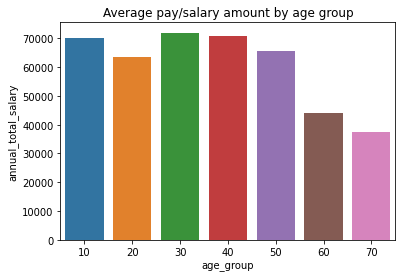

In [126]:
sns.barplot(data=for_plot, x='age_group', y='annual_total_salary').set_title("Average pay/salary amount by age group")

##### 30,40 has highest anuual salary

In [149]:
df['annual_amount'] = df['amount']*4
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,age_group,month,gender_cat,for_annual_amount,annual_amount
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,20,8,1,65.00,65.00
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,20,8,1,56.76,56.76
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,30,8,0,25.68,25.68
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,40,8,1,163.60,163.60
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,20,8,1,13.00,13.00


Text(0.5, 1.0, 'Annual Pay/Salary amount by age')

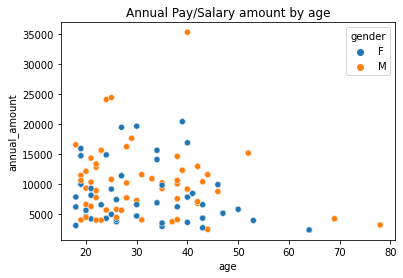

In [150]:
sns.scatterplot(data=df, x='age', y=df.loc[df['txn_description']=='PAY/SALARY']['annual_amount'],hue='gender').set_title("Annual Pay/Salary amount by age")

In [156]:
interested = ['gender']
function = ['mean', 'sum']
df.groupby(interested)['for_annual_amount'].agg(function)

,mean,sum
gender,,
F,674.069212,3881290.52
M,822.887236,5171846.28


##### Male's annual salary is higher than Female's annual salary